<br>
<br>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/6c/%D8%B4%D8%B9%D8%A7%D8%B1_%D8%A7%D9%84%D9%87%D9%8A%D8%A6%D8%A9_%D8%A7%D9%84%D8%B3%D8%B9%D9%88%D8%AF%D9%8A%D8%A9_%D9%84%D9%84%D8%A8%D9%8A%D8%A7%D9%86%D8%A7%D8%AA_%D9%88%D8%A7%D9%84%D8%B0%D9%83%D8%A7%D8%A1_%D8%A7%D9%84%D8%A7%D8%B5%D8%B7%D9%86%D8%A7%D8%B9%D9%8A_SDAIA.svg/1200px-%D8%B4%D8%B9%D8%A7%D8%B1_%D8%A7%D9%84%D9%87%D9%8A%D8%A6%D8%A9_%D8%A7%D9%84%D8%B3%D8%B9%D9%88%D8%AF%D9%8A%D8%A9_%D9%84%D9%84%D8%A8%D9%8A%D8%A7%D9%86%D8%A7%D8%AA_%D9%88%D8%A7%D9%84%D8%B0%D9%83%D8%A7%D8%A1_%D8%A7%D9%84%D8%A7%D8%B5%D8%B7%D9%86%D8%A7%D8%B9%D9%8A_SDAIA.svg.png" height="200" />
<br>
<br>

---
#  Saudi stock Prediction
- ### Amjad Almohammadi[Linkedln](https://www.linkedin.com/in/amjad-almohammadi-9b4136235/)

- ### Amjad Abdullah[Linkedln](https://www.canva.com/design/DAF1cnKh6XQ/2e6RVDocNo2OSM9FqmXOhw/watch?utm_content=DAF1cnKh6XQ&utm_campaign=designshare&utm_medium=link&utm_source=editor)

- ### Raheil Alotaibi[Linkedln](https://www.linkedin.com/in/raheil-ali/)

- ### Renad Mohammed [Linkedln](https://www.linkedin.com/in/renad-mohammed-6a2b8123b?utm_source=share&utm_campaign=share_via&utm_content=profile&utm_medium=ios_app)

- ### Maisaa Alhulimi [Linkedln](https://www.linkedin.com/in/maisaa-alhulimi-08b83918b/)

----
# Introduction


 In an effort to contribute to achieving Saudi Vision 2030, which aims to develop the financial sector and make Tadawul the main market regionally and combat corruption in it.​
We used AI to find out whether Saudi news affects market prices as is the case with foreign news and we create a model that predicts the stock price and then compares it to the real price in order to detect the presence of abnormal events in the stock market to help market analysts detect fraud and insider trading


# 1- Importing libreries

In [ ]:
pip install ta


  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29413 sha256=b4bc4fb14399022bdaf032ad8ca18f47f3ee8b7375cb2d49a125689c15caac99
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [ ]:
#pip install pandas_ta

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
# import talib
from sklearn.preprocessing import StandardScaler
import ta
#import pandas_ta as ta


from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM, Dropout , GRU
from tensorflow.keras.callbacks import EarlyStopping


import warnings
from warnings import filterwarnings
warnings.simplefilter(action='ignore')
%matplotlib inline

In [ ]:
# Adding fonts for the graph text
font1 = {'family':'serif','size':18}
font2 = {'family':'serif','size':15}
font3 = {'family':'serif','size':13}

# 2- Importing Data

In [ ]:
data = pd.read_pickle('symbol1010.pkl')
df = pd.DataFrame(data)
df1 = df.copy()
df

,Industry Group,Symbol,Company Name,Date,Open,High,Low,Close,Change,% Change,Volume Traded,Value Traded (SAR),No. of Trades
0,Banks,1010,Riyad Bank,2023-08-28,30.05,30.30,29.95,30.10,0.05,0.17,6508387,1.952849e+08,3074
1,Banks,1010,Riyad Bank,2023-08-29,30.10,30.10,29.85,30.00,-0.10,-0.33,830936,2.490231e+07,1759
2,Banks,1010,Riyad Bank,2023-08-24,29.90,30.10,29.50,30.00,0.25,0.84,2987094,8.872695e+07,3229
3,Banks,1010,Riyad Bank,2023-08-27,29.90,30.20,29.90,30.05,0.05,0.17,304031,9.127522e+06,834
4,Banks,1010,Riyad Bank,2023-08-23,30.10,30.50,29.75,29.75,-0.25,-0.83,1998819,5.987569e+07,2267
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2486,Banks,1010,Riyad Bank,2014-02-26,19.00,19.00,18.85,18.90,-0.05,-0.26,872472,1.651644e+07,303
2487,Banks,1010,Riyad Bank,2014-03-05,18.65,18.75,18.60,18.60,0.00,0.00,3211924,5.988483e+07,480
2488,Banks,1010,Riyad Bank,2014-03-06,18.65,18.75,18.60,18.70,0.10,0.54,2054982,3.836401e+07,341
2489,Banks,1010,Riyad Bank,2014-03-09,18.75,18.80,18.65,18.75,0.05,0.27,2784632,5.213342e+07,579


### 3- Data Preprocessing

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Symbol,2491.0,1.010000e+03,0.000000e+00,1010.00,1.010000e+03,1010.00,1010.00,1.010000e+03
Open,2491.0,2.039258e+01,7.845398e+00,8.65,1.395000e+01,18.35,26.55,4.220000e+01
High,2491.0,2.059464e+01,7.964930e+00,8.90,1.400000e+01,18.50,26.80,4.290000e+01
Low,2491.0,2.018026e+01,7.711711e+00,8.55,1.385500e+01,18.24,26.15,4.155000e+01
Close,2491.0,2.039615e+01,7.846642e+00,8.65,1.391000e+01,18.37,26.55,4.220000e+01
Change,2491.0,5.291048e-03,3.956608e-01,-3.30,-1.200000e-01,0.00,0.13,2.850000e+00
% Change,2491.0,3.919711e-02,1.615900e+00,-9.99,-6.900000e-01,0.00,0.73,9.540000e+00
Volume Traded,2491.0,1.584409e+06,3.645143e+06,67475.00,6.572175e+05,1102168.00,1778064.00,1.513023e+08
Value Traded (SAR),2491.0,3.379965e+07,7.382428e+07,694115.55,1.049984e+07,22183944.10,40600252.60,2.671562e+09
No. of Trades,2491.0,8.938330e+02,1.009876e+03,36.00,2.165000e+02,508.00,1240.00,1.243800e+04


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2491 entries, 0 to 2490
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Industry Group      2491 non-null   object        
 1   Symbol              2491 non-null   int64         
 2   Company Name        2491 non-null   object        
 3   Date                2491 non-null   datetime64[ns]
 4   Open                2491 non-null   float64       
 5   High                2491 non-null   float64       
 6   Low                 2491 non-null   float64       
 7   Close               2491 non-null   float64       
 8   Change              2491 non-null   float64       
 9   % Change            2491 non-null   float64       
 10  Volume Traded       2491 non-null   int64         
 11  Value Traded (SAR)  2491 non-null   float64       
 12  No. of Trades       2491 non-null   int64         
dtypes: datetime64[ns](1), float64(7), int64(3), obje

In [ ]:
df.columns

Index(['Industry Group', 'Symbol', 'Company Name', 'Date', 'Open', 'High',
       'Low', 'Close', 'Change', '% Change', 'Volume Traded',
       'Value Traded (SAR)', 'No. of Trades'],
      dtype='object')

In [ ]:
isNull = df.isnull().sum().to_frame(name='isNull').T
isNa = df.isna().sum().to_frame(name='isNa').T
Unique = df.nunique().to_frame(name='Unique').T
summary = pd.concat([Unique, isNa, isNull])
summary

,Industry Group,Symbol,Company Name,Date,Open,High,Low,Close,Change,% Change,Volume Traded,Value Traded (SAR),No. of Trades
Unique,1,1,1,2491,818,825,846,1025,197,653,2491,2491,1365
isNa,0,0,0,0,0,0,0,0,0,0,0,0,0
isNull,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.duplicated().sum()

0

# 4- Data Normalization



In [ ]:
#scaler = MinMaxScaler()
#DF[DF.columns] = scaler.fit_transform(DF)
#DF.shape

In [ ]:
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#DF[DF.columns] = scaler.fit_transform(DF)
#DF.shape

In [ ]:
DF = df[['Close']]

In [ ]:


scaler = StandardScaler()
DF[DF.columns] = np.log(DF)
DF.shape

(2491, 1)



```
# This is formatted as code
```

# 5- Adding Indicaters

## Preparing the environment for talib library to use it for MACD

In [ ]:
#!apt-get install -y build-essential
#!apt-get install -y libgmp-dev
#!apt-get install -y libmpfr-dev libmpfr-doc libmpfr6 libmpfr6-dbg

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
build-essential is already the newest version (12.9ubuntu3).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libgmpxx4ldbl
Suggested packages:
  gmp-doc libgmp10-doc libmpfr-dev
The following NEW packages will be installed:
  libgmp-dev libgmpxx4ldbl
0 upgraded, 2 newly installed, 0 to remove and 15 not upgraded.
Need to get 346 kB of archives.
After this operation, 1,702 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgmpxx4ldbl amd64 2:6.2.1+dfsg-3ubuntu1 [9,580 B]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgmp-dev amd64 2:6.2.1+dfsg-3ubuntu1 [337 kB]
Fetched 346 kB in 0s (957 kB/s)
Selecting previously unselected package libgmpxx4ldbl:amd64.
(Reading data

In [ ]:
#!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz

--2023-12-04 13:12:10--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-12-04 13:12:10--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://cytranet.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-12-04 13:12:11--  http://cytranet.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving cytranet.dl.s

In [ ]:
#!tar -xzvf ta-lib-0.4.0-src.tar.gz

ta-lib/
ta-lib/config.sub
ta-lib/aclocal.m4
ta-lib/CHANGELOG.TXT
ta-lib/include/
ta-lib/include/ta_abstract.h
ta-lib/include/ta_func.h
ta-lib/include/ta_common.h
ta-lib/include/ta_config.h.in
ta-lib/include/Makefile.am
ta-lib/include/ta_libc.h
ta-lib/include/ta_defs.h
ta-lib/missing
ta-lib/ta-lib.spec.in
ta-lib/config.guess
ta-lib/Makefile.in
ta-lib/ta-lib.dpkg.in
ta-lib/Makefile.am
ta-lib/autogen.sh
ta-lib/install-sh
ta-lib/configure
ta-lib/depcomp
ta-lib/HISTORY.TXT
ta-lib/configure.in
ta-lib/autom4te.cache/
ta-lib/autom4te.cache/output.0
ta-lib/autom4te.cache/requests
ta-lib/autom4te.cache/output.1
ta-lib/autom4te.cache/traces.0
ta-lib/autom4te.cache/traces.1
ta-lib/ltmain.sh
ta-lib/ta-lib-config.in
ta-lib/src/
ta-lib/src/ta_func/
ta-lib/src/ta_func/ta_MACDFIX.c
ta-lib/src/ta_func/ta_CDLPIERCING.c
ta-lib/src/ta_func/ta_DIV.c
ta-lib/src/ta_func/ta_ROCR100.c
ta-lib/src/ta_func/ta_ADXR.c
ta-lib/src/ta_func/ta_MAVP.c
ta-lib/src/ta_func/ta_CDLCLOSINGMARUBOZU.c
ta-lib/src/ta_func/ta_COSH.

In [ ]:
#%cd ta-lib/

/content/ta-lib


In [ ]:
#!./configure --prefix=/usr
#!make
#!make install

checking for a BSD-compatible install... /usr/bin/install -c
checking whether build environment is sane... yes
checking for a thread-safe mkdir -p... /usr/bin/mkdir -p
checking for gawk... no
checking for mawk... mawk
checking whether make sets $(MAKE)... yes
checking for gcc... gcc
checking for C compiler default output file name... a.out
checking whether the C compiler works... yes
checking whether we are cross compiling... no
checking for suffix of executables... 
checking for suffix of object files... o
checking whether we are using the GNU C compiler... yes
checking whether gcc accepts -g... yes
checking for gcc option to accept ISO C89... none needed
checking for style of include used by make... GNU
checking dependency style of gcc... gcc3
checking build system type... x86_64-unknown-linux-gnu
checking host system type... x86_64-unknown-linux-gnu
checking for a sed that does not truncate output... /usr/bin/sed
checking for grep that handles long lines and -e... /usr/bin/grep
chec

In [ ]:
pip install TA-Lib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.1/357.1 kB 2.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for TA-Lib: filename=TA_Lib-0.4.28-cp310-cp310-linux_x86_64.whl size=2017535 sha256=2ece59ba6e0aac9326f1d4d8c0b5882b7ff3645292bbb10742e674a9f4f26715
  Stored in directory: /root/.cache/pip/wheels/66/54/9d/10bfd00931c0c993f373269d350635df520b5064e5290a9d94
Successfully built TA-Lib


## MACD Indicator

In [ ]:
import talib
macd, signal, _ = talib.MACD(df['Close'])
df['MACD'] = macd
df['Signal'] = signal
df=df.dropna()
df.tail()

,Industry Group,Symbol,Company Name,Open,High,Low,Close,Change,% Change,Volume Traded,Value Traded (SAR),No. of Trades,MACD,Signal
Date,,,,,,,,,,,,,,
2014-02-26,Banks,1010,Riyad Bank,19.00,19.00,18.85,18.90,-0.05,-0.26,872472,16516440.1,303,0.513804,0.559476
2014-03-05,Banks,1010,Riyad Bank,18.65,18.75,18.60,18.60,0.00,0.00,3211924,59884832.4,480,0.476146,0.542810
2014-03-06,Banks,1010,Riyad Bank,18.65,18.75,18.60,18.70,0.10,0.54,2054982,38364009.7,341,0.449193,0.524087
2014-03-09,Banks,1010,Riyad Bank,18.75,18.80,18.65,18.75,0.05,0.27,2784632,52133421.7,579,0.426946,0.504659
2014-03-10,Banks,1010,Riyad Bank,18.70,18.70,18.60,18.65,-0.10,-0.53,2773940,51704245.7,533,0.396673,0.483062


In [ ]:
# Calculate MACD values using the pandas_ta library
#df.tap.macd(close='close', fast=12, slow=26, signal=9, append=True)
# View result
#pd.set_option("display.max_columns", None)
#df

## EMA Indicator

In [ ]:
df['ema'] = df['Close'].ewm(span=5, adjust=False, min_periods=5).mean()
df=df.dropna()
df

,Industry Group,Symbol,Company Name,Open,High,Low,Close,Change,% Change,Volume Traded,Value Traded (SAR),No. of Trades,MACD,Signal,ema
Date,,,,,,,,,,,,,,,
2023-11-02,Banks,1010,Riyad Bank,27.60,28.00,26.55,26.55,-0.85,-3.10,3911412,1.073488e+08,3770,-0.704759,-0.763884,26.383333
2023-11-05,Banks,1010,Riyad Bank,26.90,27.10,26.70,27.10,0.55,2.07,512803,1.382451e+07,672,-0.612232,-0.733554,26.622222
2023-10-31,Banks,1010,Riyad Bank,25.60,26.60,25.55,26.55,1.05,4.12,3363177,8.810766e+07,3604,-0.576637,-0.702170,26.598148
2023-11-01,Banks,1010,Riyad Bank,26.55,27.65,26.25,27.40,0.85,3.20,3256345,8.832202e+07,3424,-0.474372,-0.656611,26.865432
2023-10-29,Banks,1010,Riyad Bank,25.50,25.65,25.25,25.50,0.05,0.20,668946,1.704418e+07,1435,-0.540410,-0.633371,26.410288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-02-26,Banks,1010,Riyad Bank,19.00,19.00,18.85,18.90,-0.05,-0.26,872472,1.651644e+07,303,0.513804,0.559476,18.788457
2014-03-05,Banks,1010,Riyad Bank,18.65,18.75,18.60,18.60,0.00,0.00,3211924,5.988483e+07,480,0.476146,0.542810,18.725638
2014-03-06,Banks,1010,Riyad Bank,18.65,18.75,18.60,18.70,0.10,0.54,2054982,3.836401e+07,341,0.449193,0.524087,18.717092


## OBV Indicator

In [ ]:

df['OBV'] = ta.volume.on_balance_volume(df['Close'], df['Volume Traded'])
df=df.dropna()
df

,Industry Group,Symbol,Company Name,Open,High,Low,Close,Change,% Change,Volume Traded,Value Traded (SAR),No. of Trades,MACD,Signal,ema,OBV
Date,,,,,,,,,,,,,,,,
2023-11-02,Banks,1010,Riyad Bank,27.60,28.00,26.55,26.55,-0.85,-3.10,3911412,1.073488e+08,3770,-0.704759,-0.763884,26.383333,3911412
2023-11-05,Banks,1010,Riyad Bank,26.90,27.10,26.70,27.10,0.55,2.07,512803,1.382451e+07,672,-0.612232,-0.733554,26.622222,4424215
2023-10-31,Banks,1010,Riyad Bank,25.60,26.60,25.55,26.55,1.05,4.12,3363177,8.810766e+07,3604,-0.576637,-0.702170,26.598148,1061038
2023-11-01,Banks,1010,Riyad Bank,26.55,27.65,26.25,27.40,0.85,3.20,3256345,8.832202e+07,3424,-0.474372,-0.656611,26.865432,4317383
2023-10-29,Banks,1010,Riyad Bank,25.50,25.65,25.25,25.50,0.05,0.20,668946,1.704418e+07,1435,-0.540410,-0.633371,26.410288,3648437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-02-26,Banks,1010,Riyad Bank,19.00,19.00,18.85,18.90,-0.05,-0.26,872472,1.651644e+07,303,0.513804,0.559476,18.788457,690930029
2014-03-05,Banks,1010,Riyad Bank,18.65,18.75,18.60,18.60,0.00,0.00,3211924,5.988483e+07,480,0.476146,0.542810,18.725638,687718105
2014-03-06,Banks,1010,Riyad Bank,18.65,18.75,18.60,18.70,0.10,0.54,2054982,3.836401e+07,341,0.449193,0.524087,18.717092,689773087


## ART Indicator

In [ ]:
df['ATR'] = ta.volatility.average_true_range(df['High'], df['Low'], df['Close'])
df=df.dropna()
df

,Industry Group,Symbol,Company Name,Open,High,Low,Close,Change,% Change,Volume Traded,Value Traded (SAR),No. of Trades,MACD,Signal,ema,OBV,ATR
Date,,,,,,,,,,,,,,,,,
2023-11-02,Banks,1010,Riyad Bank,27.60,28.00,26.55,26.55,-0.85,-3.10,3911412,1.073488e+08,3770,-0.704759,-0.763884,26.383333,3911412,0.000000
2023-11-05,Banks,1010,Riyad Bank,26.90,27.10,26.70,27.10,0.55,2.07,512803,1.382451e+07,672,-0.612232,-0.733554,26.622222,4424215,0.000000
2023-10-31,Banks,1010,Riyad Bank,25.60,26.60,25.55,26.55,1.05,4.12,3363177,8.810766e+07,3604,-0.576637,-0.702170,26.598148,1061038,0.000000
2023-11-01,Banks,1010,Riyad Bank,26.55,27.65,26.25,27.40,0.85,3.20,3256345,8.832202e+07,3424,-0.474372,-0.656611,26.865432,4317383,0.000000
2023-10-29,Banks,1010,Riyad Bank,25.50,25.65,25.25,25.50,0.05,0.20,668946,1.704418e+07,1435,-0.540410,-0.633371,26.410288,3648437,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-02-26,Banks,1010,Riyad Bank,19.00,19.00,18.85,18.90,-0.05,-0.26,872472,1.651644e+07,303,0.513804,0.559476,18.788457,690930029,0.318227
2014-03-05,Banks,1010,Riyad Bank,18.65,18.75,18.60,18.60,0.00,0.00,3211924,5.988483e+07,480,0.476146,0.542810,18.725638,687718105,0.316925
2014-03-06,Banks,1010,Riyad Bank,18.65,18.75,18.60,18.70,0.10,0.54,2054982,3.836401e+07,341,0.449193,0.524087,18.717092,689773087,0.305002


## RSI Indicator

In [ ]:

rsi = ta. momentum. RSIIndicator(close=df['Close'], window=14)
df['RSI'] = rsi. rsi()
df=df.dropna()
df

,Industry Group,Symbol,Company Name,Open,High,Low,Close,Change,% Change,Volume Traded,Value Traded (SAR),No. of Trades,MACD,Signal,ema,OBV,ATR,RSI
Date,,,,,,,,,,,,,,,,,,
2023-11-19,Banks,1010,Riyad Bank,27.60,27.85,27.50,27.65,0.10,0.36,337180,9325933.40,518,-0.129339,-0.401849,27.132542,16495372,0.996429,62.354815
2023-11-14,Banks,1010,Riyad Bank,27.00,27.60,26.95,27.30,0.25,0.92,1733850,47465737.15,1588,-0.073846,-0.336249,27.188361,14761522,0.975255,57.711277
2023-11-15,Banks,1010,Riyad Bank,27.55,27.80,27.25,27.60,0.30,1.10,1289060,35420835.60,1661,-0.005596,-0.270118,27.325574,16050582,0.944880,60.431277
2023-11-12,Banks,1010,Riyad Bank,27.50,27.70,27.15,27.20,-0.25,-0.91,371327,10168411.10,564,0.016032,-0.212888,27.283716,15679255,0.916674,55.321933
2023-11-13,Banks,1010,Riyad Bank,27.20,27.35,26.35,27.05,-0.15,-0.55,2222126,59814618.75,1906,0.020828,-0.166145,27.205811,13457129,0.922626,53.495367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-02-26,Banks,1010,Riyad Bank,19.00,19.00,18.85,18.90,-0.05,-0.26,872472,16516440.10,303,0.513804,0.559476,18.788457,690930029,0.318227,69.132226
2014-03-05,Banks,1010,Riyad Bank,18.65,18.75,18.60,18.60,0.00,0.00,3211924,59884832.40,480,0.476146,0.542810,18.725638,687718105,0.316925,60.939559
2014-03-06,Banks,1010,Riyad Bank,18.65,18.75,18.60,18.70,0.10,0.54,2054982,38364009.70,341,0.449193,0.524087,18.717092,689773087,0.305002,62.533426


## A/D Indicator

In [ ]:
# Calculate A/D line
df['A/D'] = ta.volume.acc_dist_index(df['High'], df['Low'], df['Close'], df['Volume Traded'])

df=df.dropna()
df

,Industry Group,Symbol,Company Name,Open,High,Low,Close,Change,% Change,Volume Traded,Value Traded (SAR),No. of Trades,MACD,Signal,ema,OBV,ATR,RSI,A/D
Date,,,,,,,,,,,,,,,,,,,
2023-11-19,Banks,1010,Riyad Bank,27.60,27.85,27.50,27.65,0.10,0.36,337180,9325933.40,518,-0.129339,-0.401849,27.132542,16495372,0.996429,62.354815,-4.816857e+04
2023-11-14,Banks,1010,Riyad Bank,27.00,27.60,26.95,27.30,0.25,0.92,1733850,47465737.15,1588,-0.073846,-0.336249,27.188361,14761522,0.975255,57.711277,8.520451e+04
2023-11-15,Banks,1010,Riyad Bank,27.55,27.80,27.25,27.60,0.30,1.10,1289060,35420835.60,1661,-0.005596,-0.270118,27.325574,16050582,0.944880,60.431277,4.367663e+05
2023-11-12,Banks,1010,Riyad Bank,27.50,27.70,27.15,27.20,-0.25,-0.91,371327,10168411.10,564,0.016032,-0.212888,27.283716,15679255,0.916674,55.321933,1.329533e+05
2023-11-13,Banks,1010,Riyad Bank,27.20,27.35,26.35,27.05,-0.15,-0.55,2222126,59814618.75,1906,0.020828,-0.166145,27.205811,13457129,0.922626,53.495367,1.021804e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-02-26,Banks,1010,Riyad Bank,19.00,19.00,18.85,18.90,-0.05,-0.26,872472,16516440.10,303,0.513804,0.559476,18.788457,690930029,0.318227,69.132226,4.027644e+08
2014-03-05,Banks,1010,Riyad Bank,18.65,18.75,18.60,18.60,0.00,0.00,3211924,59884832.40,480,0.476146,0.542810,18.725638,687718105,0.316925,60.939559,3.995525e+08
2014-03-06,Banks,1010,Riyad Bank,18.65,18.75,18.60,18.70,0.10,0.54,2054982,38364009.70,341,0.449193,0.524087,18.717092,689773087,0.305002,62.533426,4.002375e+08


In [ ]:
DF = df[['Close']]

## 6- Splitting the Data into two folders: Train data and Test data

In [ ]:
training_size = round(len(DF) * 0.80)

train_data = DF.iloc[:training_size,0:4]
test_data  = DF.iloc[training_size:,0:4]

train_data.shape, test_data.shape

((1953, 1), (488, 1))

# 7- Creating training data sequences and labels

In [ ]:
def prepare_time_series_data(Data,window_size):
    #Creates sequences of data and corresponding labels for training and testing.
  sequences = []
  labels = []
  i = 0

  for j in range(window_size,len(Data)):
    sequences.append(Data.iloc[i:j])
    labels.append(Data.iloc[j])
    i += 1

  return np.array(sequences),np.array(labels)

In [ ]:
X_train, y_train = prepare_time_series_data(train_data,60)
X_test, y_test = prepare_time_series_data(test_data,60)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1893, 60, 1), (1893, 1), (428, 60, 1), (428, 1))

# 8- Modeling

# 8-1 LSTM Models


## 8-1-1 The First and Simple LSTM Model

In [ ]:
length = 60
LSTM1 = Sequential()

# Simple RNN layer
LSTM1.add(LSTM(100,return_sequences=True,input_shape=(length,X_train.shape[2])))
LSTM1.add(Dropout(0.2))
LSTM1.add(LSTM(100,return_sequences=False,input_shape=(length,X_train.shape[2])))
LSTM1.add(Dropout(0.2))
LSTM1.add(Dense(X_train.shape[2]))

LSTM1.compile(optimizer='adam', loss='mean_squared_error',metrics=['mean_absolute_error'])


In [ ]:
LSTM1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 dropout (Dropout)           (None, 60, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 121301 (473.83 KB)
Trainable params: 121301 (473.83 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
early_stop = EarlyStopping(monitor='loss',patience=5)

In [ ]:
LSTM1.fit(X_train, y_train,epochs=30,validation_data=(X_test, y_test), batch_size=64,callbacks=[early_stop])


Epoch 1/30
30/30 [==============================] - 24s 517ms/step - loss: 261.6626 - mean_absolute_error: 13.3414 - val_loss: 24.1282 - val_mean_absolute_error: 4.5532
Epoch 2/30
30/30 [==============================] - 9s 314ms/step - loss: 103.5631 - mean_absolute_error: 7.9731 - val_loss: 4.7926 - val_mean_absolute_error: 1.7514
Epoch 3/30
30/30 [==============================] - 8s 254ms/step - loss: 81.3064 - mean_absolute_error: 7.3725 - val_loss: 3.8221 - val_mean_absolute_error: 1.4583
Epoch 4/30
30/30 [==============================] - 6s 199ms/step - loss: 74.4515 - mean_absolute_error: 7.2774 - val_loss: 6.4363 - val_mean_absolute_error: 2.1702
Epoch 5/30
30/30 [==============================] - 8s 267ms/step - loss: 72.5734 - mean_absolute_error: 7.2792 - val_loss: 9.0835 - val_mean_absolute_error: 2.6592
Epoch 6/30
30/30 [==============================] - 6s 190ms/step - loss: 70.9007 - mean_absolute_error: 7.2059 - val_loss: 8.0634 - val_mean_absolute_error: 2.4924
Epoch

In [ ]:
LSTM1.history.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

### 6-1-1-1 Visualizing Model Metrics

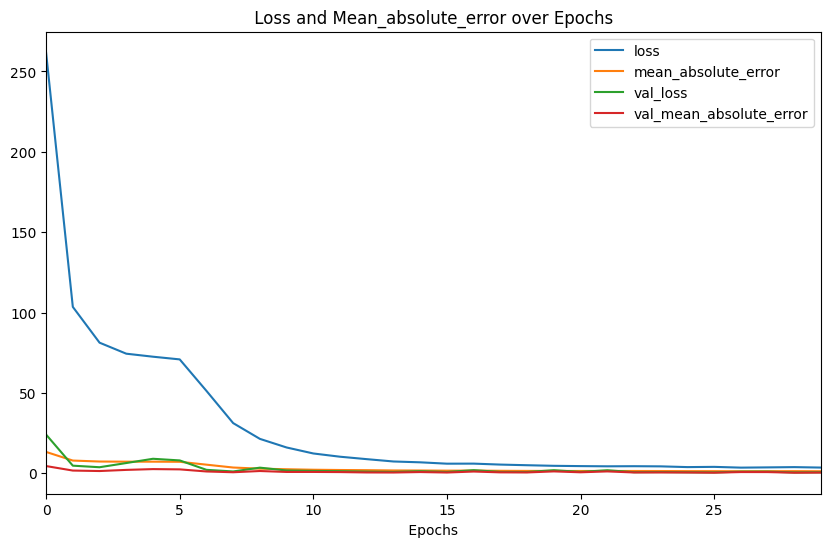

In [ ]:
title=' Loss and Mean_absolute_error over Epochs '

xlabel=' Epochs '

LSTM1_losses = pd.DataFrame(LSTM1.history.history)
ax = LSTM1_losses.plot(figsize=(10,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel);


In [ ]:
def highlight_best(data):
    data_highlighted = data.copy()
    min_loss = data_highlighted['loss'].min()
    min_mae = data_highlighted['mean_absolute_error'].min()
    min_val_loss = data_highlighted['val_loss'].min()
    min_val_mae = data_highlighted['val_mean_absolute_error'].min()
    # Create boolean masks to identify the maximum values
    min_loss = data_highlighted['loss'] == min_loss
    min_mae = data_highlighted['mean_absolute_error'] == min_mae
    min_val_loss = data_highlighted['val_loss'] == min_val_loss
    min_val_mae = data_highlighted['val_mean_absolute_error'] == min_val_mae
    # Apply a custom highlighting style to the maximum values using CSS
    data_highlighted = data_highlighted.style.apply(lambda x: ['background: yellow' if v else '' for v in min_loss],
                subset=['loss']).apply(lambda x: ['background: yellow' if v else '' for v in min_mae],
                subset=['mean_absolute_error']).apply(lambda x: ['background: yellow' if v else '' for v in min_val_loss],
                subset=['val_loss']).apply(lambda x: ['background: yellow' if v else '' for v in min_val_mae],
                                                    subset=['val_mean_absolute_error'])

    return data_highlighted

In [ ]:
highlighted_LSTM1_losses = highlight_best(LSTM1_losses)
highlighted_LSTM1_losses

,loss,mean_absolute_error,val_loss,val_mean_absolute_error
0,261.662598,13.341404,24.128208,4.553160
1,103.563133,7.973055,4.792622,1.751444
2,81.306366,7.372492,3.822063,1.458321
3,74.451508,7.277440,6.436329,2.170211
4,72.573425,7.279228,9.083530,2.659232
5,70.900696,7.205910,8.063396,2.492423
6,51.323132,5.420429,2.202538,1.190587
7,31.272146,3.639709,1.195689,0.703266
8,21.466272,2.934341,3.556576,1.470879
9,16.107058,2.571326,1.800990,0.890282


### 6-1-1-2 Evaluation the first LSTM Model on Test Data

In [ ]:
def predict_and_inverse_transform(df, X_test, model, scaler):
    test = df.iloc[-len(X_test):].copy()

    predictions = model.predict(X_test)
    inverse_predictions = scaler.inverse_transform(predictions)
    inverse_predictions = pd.DataFrame(inverse_predictions, columns=['Predicted Close'], index=df.iloc[-len(X_test):].index)

    test_df = pd.concat([test.copy(), inverse_predictions], axis=1)
    test_df[['Close']] = scaler.inverse_transform(test_df[['Close']])

    return test_df

In [ ]:
def predict_and_inverse_transform(df, X_test, model):
    test = df.iloc[-len(X_test):].copy()

    predictions = model.predict(X_test)
    inverse_predictions = pd.DataFrame(predictions, columns=['Predicted Close'], index=df.iloc[-len(X_test):].index)

    test_df = pd.concat([test.copy(), inverse_predictions], axis=1)

    return test_df

In [ ]:
test_df = predict_and_inverse_transform(DF, X_test, LSTM1)


14/14 [==============================] - 1s 32ms/step


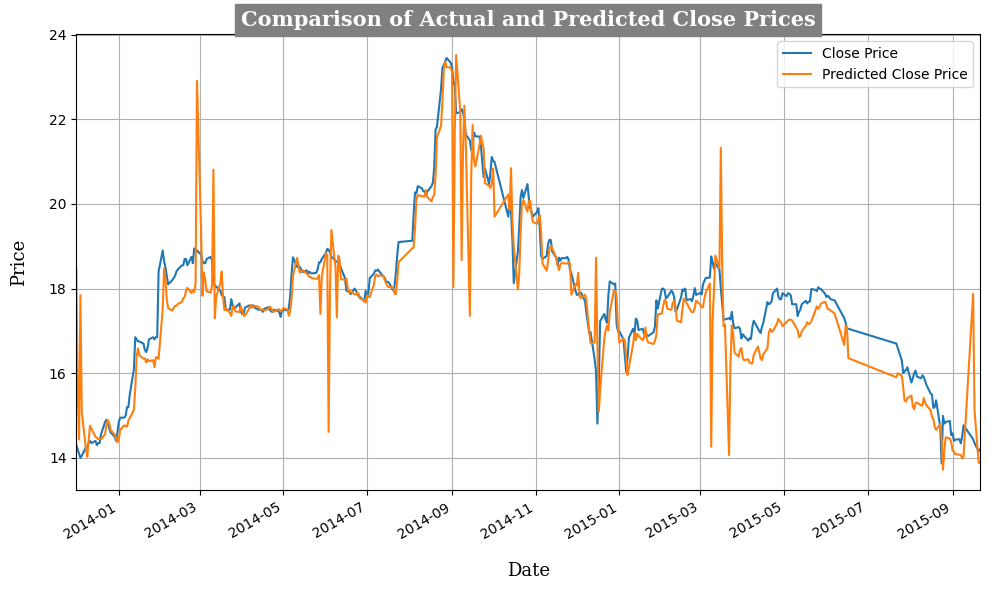

In [ ]:
plt.figure(figsize=(10, 6))
test_df['Close'].plot(label='Close Price').autoscale(axis='x',tight=True)
test_df['Predicted Close'].plot(label='Predicted Close Price').autoscale(axis='x',tight=True)

plt.legend()
plt.title('Comparison of Actual and Predicted Close Prices',backgroundcolor='grey',color='white',fontdict=font2, fontweight='bold')
plt.xlabel('Date',fontdict=font3,labelpad=15)
plt.ylabel('Price',fontdict=font3,labelpad=15)
plt.grid(True)
plt.tight_layout()




## 8-1-2 Second LSTM Model

In [ ]:
LSTM2 = Sequential()

# First LSTM layer
LSTM2.add(LSTM(150, input_shape=(length,X_train.shape[2]), return_sequences=True))
LSTM2.add(Dropout(0.2))

# Second LSTM layer
LSTM2.add(LSTM(100, input_shape=(length,X_train.shape[2]), return_sequences=True))
LSTM2.add(Dropout(0.2))

# Third LSTM layer
LSTM2.add(LSTM(100, input_shape=(length,X_train.shape[2]), return_sequences=False))
LSTM2.add(Dropout(0.2))

# Final Prediction (one neuron per feature)
LSTM2.add(Dense(units=50))
LSTM2.add(Dense(units=5))
LSTM2.add(Dense(X_train.shape[2]))

LSTM2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mean_absolute_error'])


In [ ]:
LSTM2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 150)           91200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 150)           0         
                                                                 
 lstm_3 (LSTM)               (None, 60, 100)           100400    
                                                                 
 dropout_3 (Dropout)         (None, 60, 100)           0         
                                                                 
 lstm_4 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 50)               

In [ ]:
LSTM2.fit(X_train, y_train,epochs=30,validation_data=(X_test, y_test),batch_size = 32,callbacks=[early_stop],verbose=1)

Epoch 1/30
60/60 [==============================] - 25s 278ms/step - loss: 91.7850 - mean_absolute_error: 7.4866 - val_loss: 2.8074 - val_mean_absolute_error: 1.4072
Epoch 2/30
60/60 [==============================] - 15s 257ms/step - loss: 7.8737 - mean_absolute_error: 2.0453 - val_loss: 1.7190 - val_mean_absolute_error: 1.0350
Epoch 3/30
60/60 [==============================] - 15s 256ms/step - loss: 5.0167 - mean_absolute_error: 1.6383 - val_loss: 1.2351 - val_mean_absolute_error: 0.7624
Epoch 4/30
60/60 [==============================] - 15s 249ms/step - loss: 4.6428 - mean_absolute_error: 1.5656 - val_loss: 2.2740 - val_mean_absolute_error: 1.3292
Epoch 5/30
60/60 [==============================] - 15s 249ms/step - loss: 4.9015 - mean_absolute_error: 1.5969 - val_loss: 1.8878 - val_mean_absolute_error: 1.1725
Epoch 6/30
60/60 [==============================] - 15s 258ms/step - loss: 4.2201 - mean_absolute_error: 1.5021 - val_loss: 0.9583 - val_mean_absolute_error: 0.6244
Epoch 7/3

### 6-1-2-1 Visualizing Model Metrics

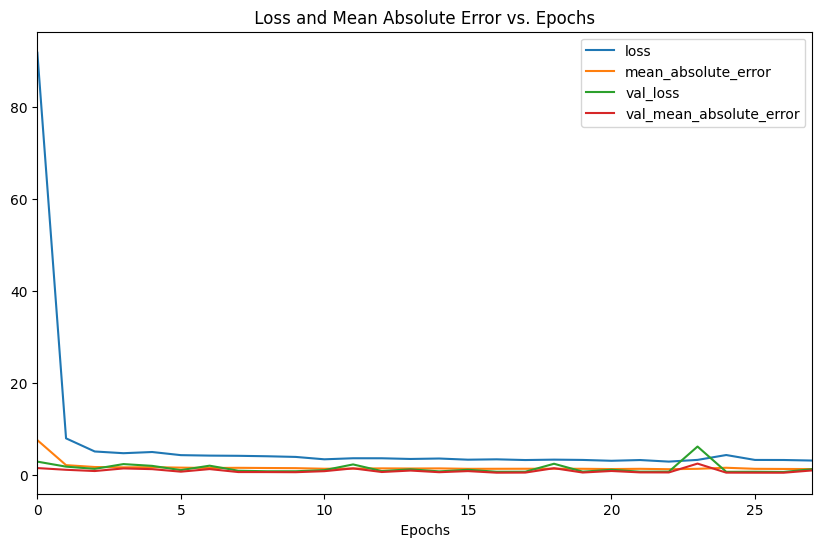

In [ ]:
title=' Loss and Mean Absolute Error vs. Epochs '
xlabel=' Epochs '
LSTM2_losses = pd.DataFrame(LSTM2.history.history)

ax = LSTM2_losses.plot(figsize=(10,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel);



In [ ]:
highlighted_LSTM2_losses = highlight_best(LSTM2_losses)
highlighted_LSTM2_losses

,loss,mean_absolute_error,val_loss,val_mean_absolute_error
0,91.785004,7.486561,2.807423,1.407179
1,7.873681,2.045277,1.719001,1.035005
2,5.016698,1.638285,1.235116,0.762425
3,4.642817,1.565628,2.274020,1.329178
4,4.901513,1.596891,1.887810,1.172542
5,4.220052,1.502104,0.958341,0.624395
6,4.119575,1.424165,1.927870,1.186524
7,4.075993,1.463391,0.829103,0.540057
8,3.978140,1.421239,0.713195,0.533841
9,3.833572,1.389004,0.712717,0.508850


### 6-1-2-2 Evaluation the second Model on Test Data

In [ ]:
test_df2 = predict_and_inverse_transform(DF, X_test, LSTM2)

14/14 [==============================] - 2s 66ms/step


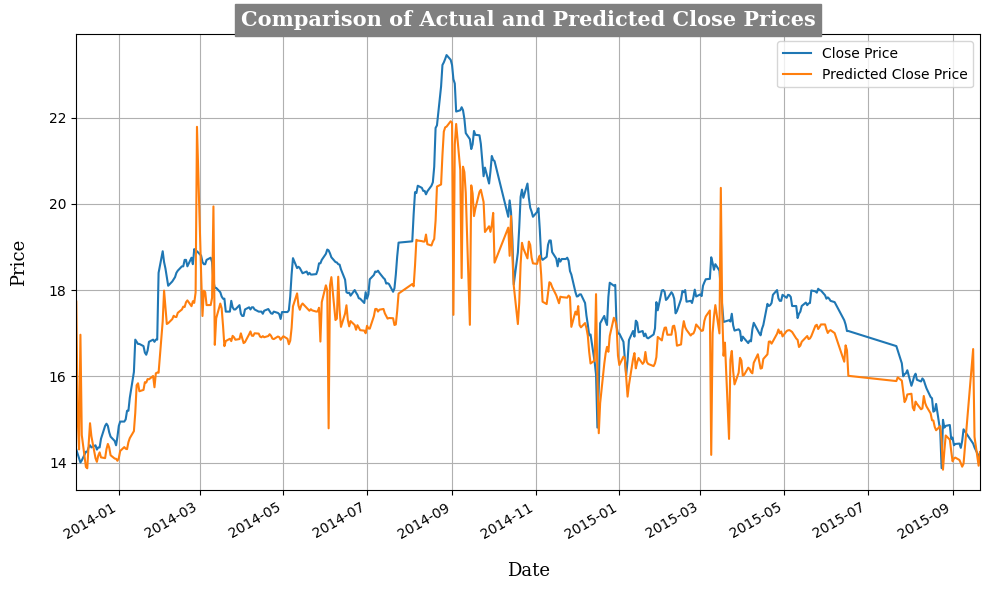

In [ ]:
plt.figure(figsize=(10, 6))
test_df2['Close'].plot(label='Close Price').autoscale(axis='x',tight=True)
test_df2['Predicted Close'].plot(label='Predicted Close Price').autoscale(axis='x',tight=True)

plt.legend()
plt.title('Comparison of Actual and Predicted Close Prices',backgroundcolor='grey',color='white',fontdict=font2, fontweight='bold')
plt.xlabel('Date',fontdict=font3,labelpad=15)
plt.ylabel('Price',fontdict=font3,labelpad=15)
plt.grid(True)
plt.tight_layout()
plt.show()


# 8-2 GRU Model

In [ ]:
GRU_Model = Sequential()

# Add a GRU layer with input_shape
GRU_Model.add(GRU(128, input_shape=(length, X_train.shape[2]), activation='tanh'))

# Add the final Dense layer (one neuron per feature)
GRU_Model.add(Dense(X_train.shape[2]))

# Compile the model
GRU_Model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])


In [ ]:
GRU_Model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               50304     
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 50433 (197.00 KB)
Trainable params: 50433 (197.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
GRU_Model.fit(X_train, y_train, epochs=30,validation_data=(X_test, y_test),batch_size = 32,callbacks=[early_stop],verbose=1)

Epoch 1/30
60/60 [==============================] - 8s 96ms/step - loss: 215.7104 - mean_absolute_error: 11.5700 - val_loss: 5.0700 - val_mean_absolute_error: 1.8322
Epoch 2/30
60/60 [==============================] - 3s 58ms/step - loss: 62.2418 - mean_absolute_error: 5.6158 - val_loss: 1.7000 - val_mean_absolute_error: 1.1058
Epoch 3/30
60/60 [==============================] - 4s 59ms/step - loss: 29.3703 - mean_absolute_error: 3.2077 - val_loss: 0.9529 - val_mean_absolute_error: 0.5631
Epoch 4/30
60/60 [==============================] - 4s 62ms/step - loss: 16.2301 - mean_absolute_error: 2.2016 - val_loss: 0.8107 - val_mean_absolute_error: 0.5367
Epoch 5/30
60/60 [==============================] - 5s 82ms/step - loss: 9.9506 - mean_absolute_error: 1.5880 - val_loss: 0.6364 - val_mean_absolute_error: 0.4260
Epoch 6/30
60/60 [==============================] - 4s 58ms/step - loss: 6.6970 - mean_absolute_error: 1.3226 - val_loss: 0.6203 - val_mean_absolute_error: 0.4429
Epoch 7/30
60/60

## 8-2-1 Visualizing Model Metrics

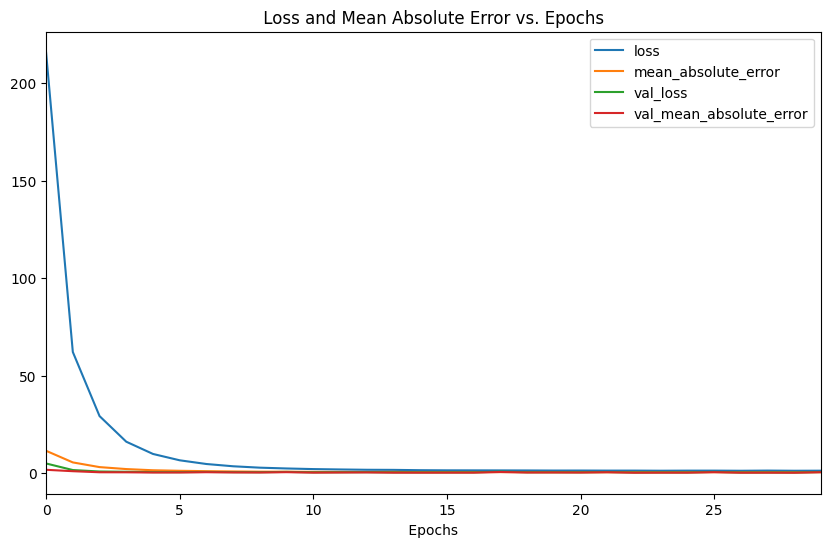

In [ ]:
title=' Loss and Mean Absolute Error vs. Epochs '
xlabel=' Epochs '
GRU_losses = pd.DataFrame(GRU_Model.history.history)

ax = GRU_losses.plot(figsize=(10,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel);



In [ ]:
highlighted_GRU_losses = highlight_best(GRU_losses)
highlighted_GRU_losses

,loss,mean_absolute_error,val_loss,val_mean_absolute_error
0,215.710419,11.570031,5.069978,1.832243
1,62.241776,5.615770,1.700012,1.105797
2,29.370348,3.207688,0.952879,0.563050
3,16.230091,2.201587,0.810690,0.536698
4,9.950617,1.588045,0.636358,0.426041
5,6.697006,1.322636,0.620268,0.442930
6,4.795477,1.123643,0.728882,0.585768
7,3.633335,0.977151,0.616047,0.475855
8,2.917708,0.865297,0.582253,0.438528
9,2.508273,0.847466,0.750277,0.607319


## 8-2-2 Evaluation GRU Model on Test Data

In [ ]:
def predict_and_inverse_transform2(df, X_test, model, scaler):
    test = df.iloc[-len(X_test):].copy()

    predictions = model.predict(X_test)
    inverse_predictions = scaler.inverse_transform(predictions)
    inverse_predictions = pd.DataFrame(inverse_predictions, columns=['Predicted Close'], index=df.iloc[-len(X_test):].index)

    test_df = pd.concat([test.copy(), inverse_predictions], axis=1)
    test_df[['Close']] = scaler.inverse_transform(test_df[['Close']])

    return test_df

In [ ]:
def predict_and_inverse_transform(df, X_test, model):
    test = df.iloc[-len(X_test):].copy()

    predictions = model.predict(X_test)
    inverse_predictions = pd.DataFrame(predictions, columns=['Predicted Close'], index=df.iloc[-len(X_test):].index)

    test_df = pd.concat([test.copy(), inverse_predictions], axis=1)

    return test_df

In [ ]:
test_df3 = predict_and_inverse_transform(DF, X_test, GRU_Model)


14/14 [==============================] - 1s 15ms/step


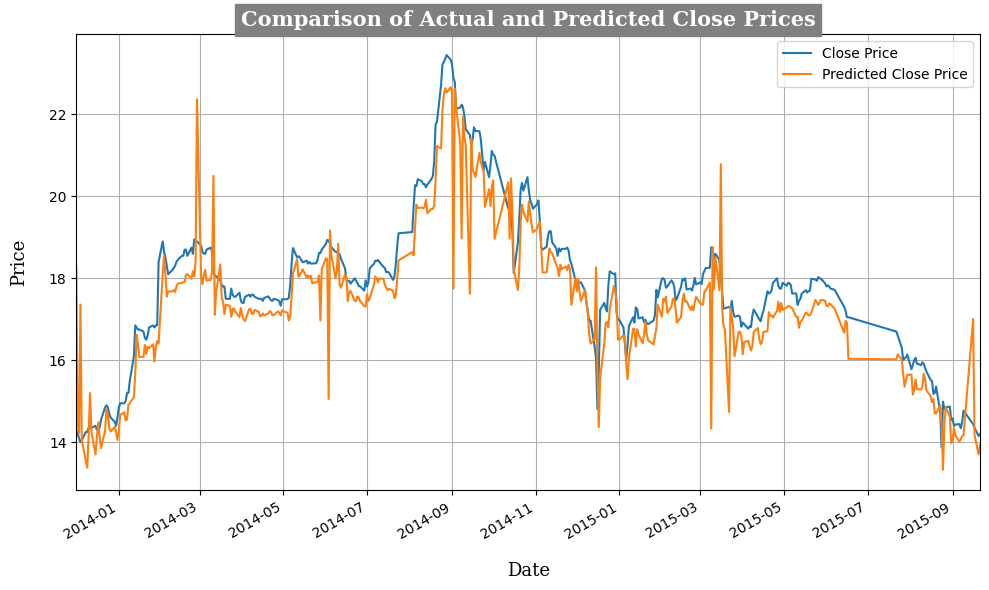

In [ ]:
plt.figure(figsize=(10, 6))
test_df3['Close'].plot(label='Close Price').autoscale(axis='x',tight=True)
test_df3['Predicted Close'].plot(label='Predicted Close Price').autoscale(axis='x',tight=True)

plt.legend()
plt.title('Comparison of Actual and Predicted Close Prices',backgroundcolor='grey',color='white',fontdict=font2, fontweight='bold')
plt.xlabel('Date',fontdict=font3,labelpad=15)
plt.ylabel('Price',fontdict=font3,labelpad=15)
plt.grid(True)
plt.tight_layout()


italicized text# vectorbt

In [ ]:
pip install vectorbt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.7/526.7 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.6/34.6 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.9 MB/s eta 0:00:00
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.41.1
    Uninstalling llvmlite-0.41.1:
      Successfully uninstalled llvmlite-0.41.1
  Attempting uninstall: numba
    Found existing installation: numba 0.58.1
    Uninstalling numba-0.58.1:
      Successfully uninstalled numba-0.58.1


In [ ]:
import vectorbt as vbt

# Calculate moving averages
df['ma_fast'] = df['Close'].rolling(window=10).mean()
df['ma_slow'] = df['Close'].rolling(window=20).mean()

# Generate signals based on moving average crossover
df['buy_signal'] = df['ma_fast'] > df['ma_slow']
df['sell_signal'] = df['ma_fast'] <= df['ma_slow']

# Create a portfolio based on the signals
portfolio = vbt.Portfolio.from_signals(
    close=df['Close'],  # Pass 'Close' as the 'close' argument
    entries=df['buy_signal'],
    exits=df['sell_signal']
)

# Analyze portfolio performance
stats = portfolio.stats()

# Plot the portfolio performance
portfolio.plot().show()